# Seaborn

In [2]:
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ヒストグラム：　sns.displot()

In [4]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

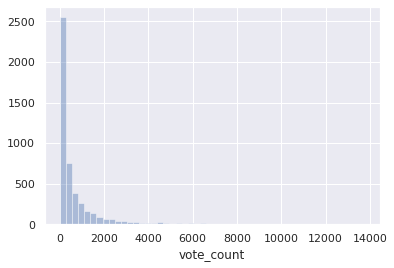

In [7]:
sns.set()
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

## 散布図

### sns.jointplot()

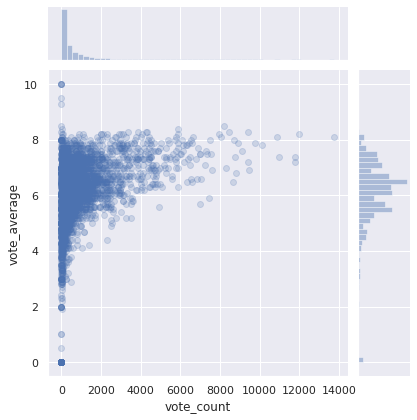

In [8]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

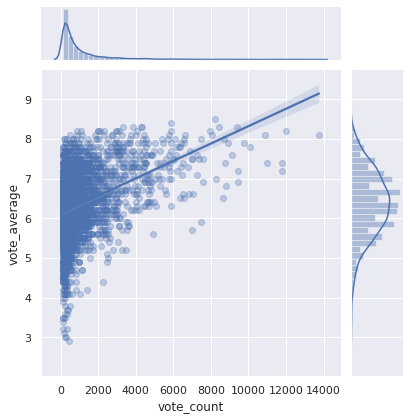

In [16]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df = df[df['vote_count'] >100]
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': dict(alpha=0.3)})

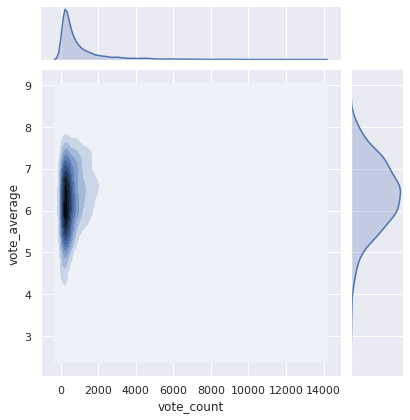

In [18]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

### sns.pairplot()

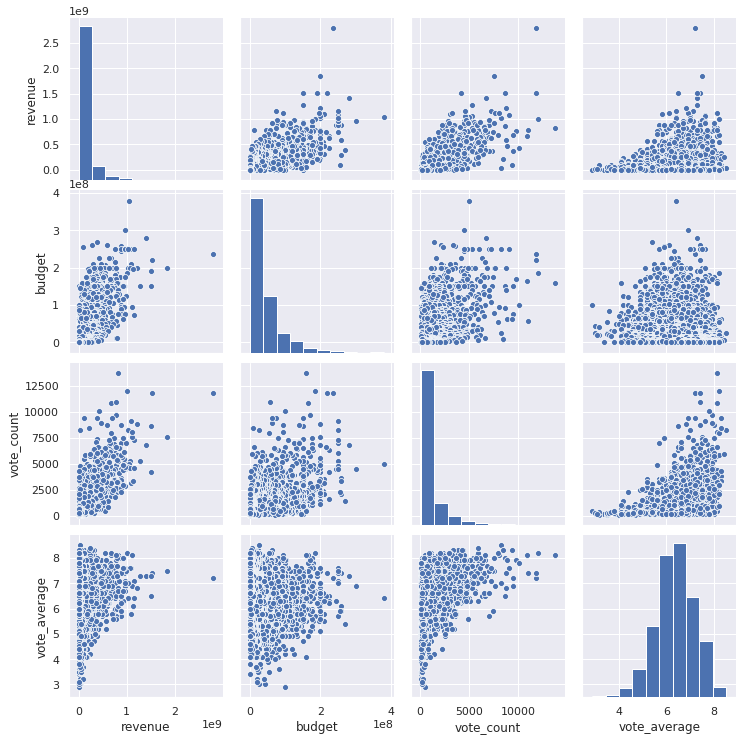

In [20]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

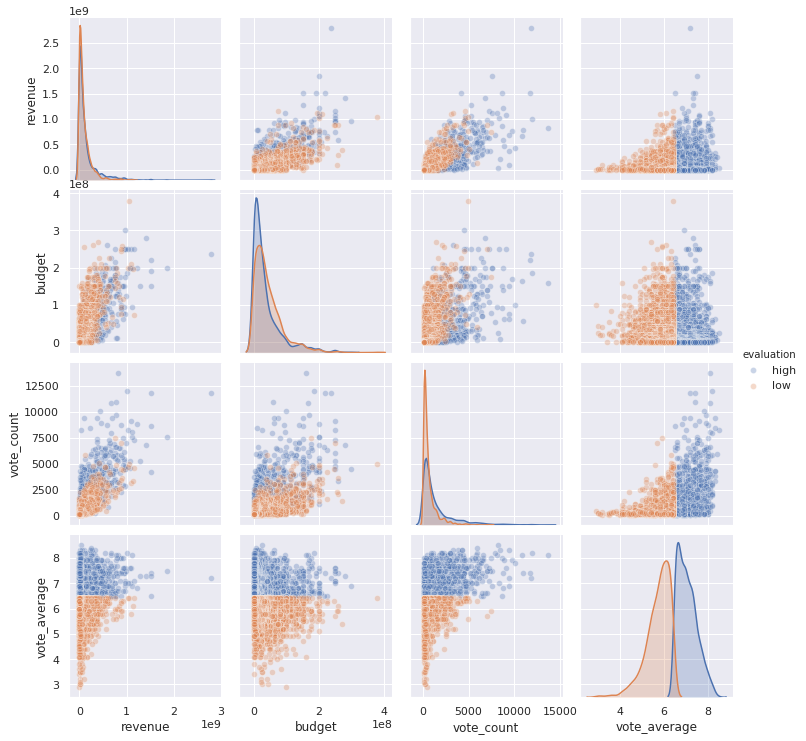

In [27]:
# vote_avetrageが下位50%だったらlow, 上位50%だったらhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
            hue='evaluation', plot_kws={'alpha':0.3})

## Categorical Plot

### sns.barplot()

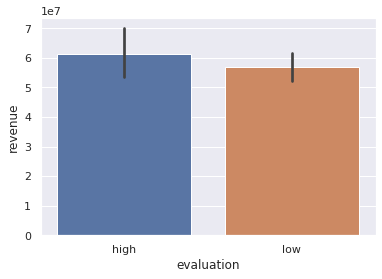

In [30]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

### sns.countplot()

In [31]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,high,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,low,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,high,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,low,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,high,1994
4778,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,38780,"[{""id"": 10022, ""name"": ""rampage""}, {""id"": 1454...",en,Rampage,The boredom of small town life is eating Bill ...,7.101197,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...",...,0,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance is ruthless.,Rampage,6.0,131,low,2009
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]",...,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,low,1972
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""d

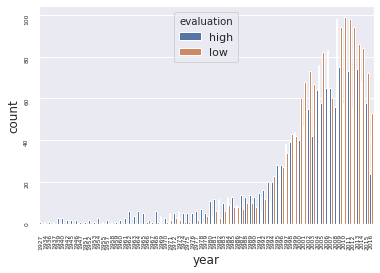

In [36]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

count     3150
unique      75
top       2011
freq       171
Name: year, dtype: object

In [45]:
# 年代カラム　(decade) 
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,year,decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high,2009,2000s
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,high,2007,2000s
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,low,2015,2010s
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,high,2012,2010s
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,low,2012,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,high,1994,1990s
4778,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,38780,"[{""id"": 10022, ""name"": ""rampage""}, {""id"": 1454...",en,Rampage,The boredom of small town life is eating Bill ...,7.101197,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...",...,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance is ruthless.,Rampage,6.0,131,low,2009,2000s
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]",...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,low,1972,1970s
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 21

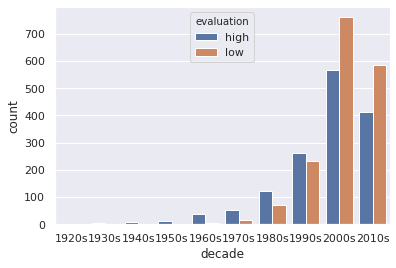

In [47]:
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

### sns.boxplot()

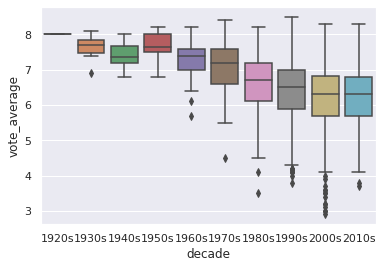

In [49]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.violinplot()

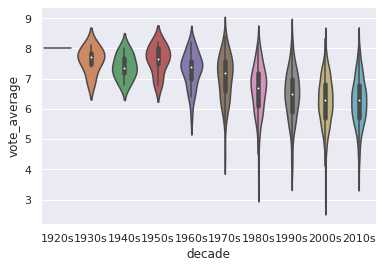

In [51]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.swarmplot()

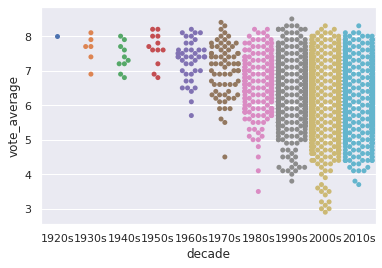

In [52]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

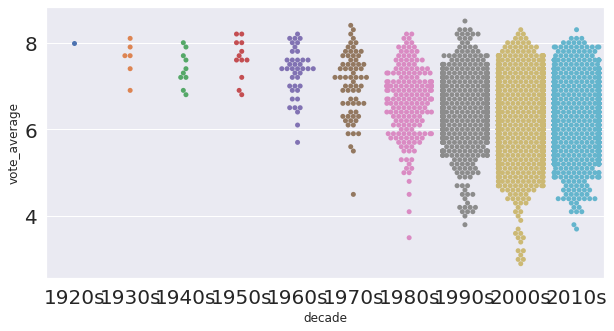

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(labelsize=20)
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

## Heatmap

### .corr()

In [65]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df = df[(df != 0).all(axis=1)]
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


### sns.heatmap()

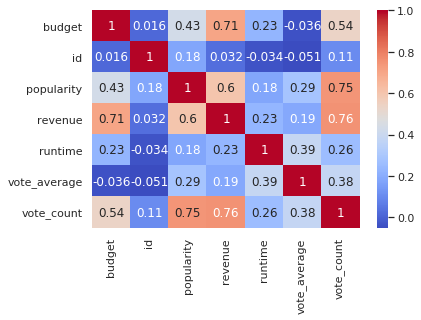

In [67]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [68]:
df['release_date'].describe

<bound method NDFrame.describe of 0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4773    1994-09-13
4788    1972-03-12
4792    1997-11-06
4796    2004-10-08
4798    1992-09-04
Name: release_date, Length: 3227, dtype: object>

In [74]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')

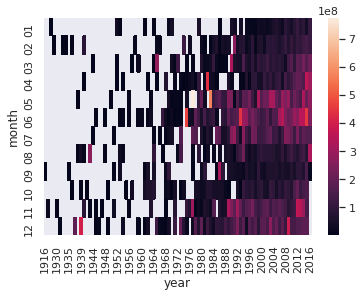

In [75]:
sns.heatmap(revenue_df)

## Styleや付属情報

### sns.set()

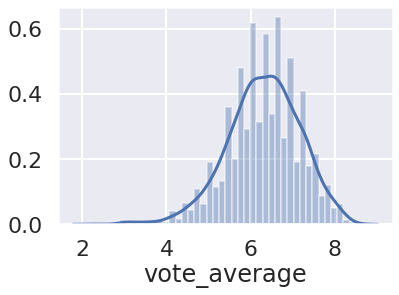

In [76]:
# context: 'paper', 'notebook', 'poster'
sns.set(context='poster')
sns.distplot(df['vote_average'])

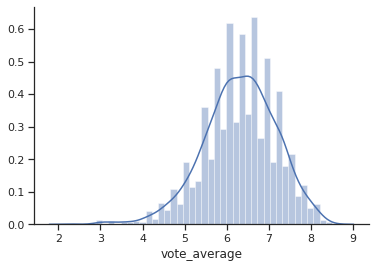

In [78]:
# style: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set(context='notebook', style='ticks')
sns.distplot(df['vote_average'])
sns.despine()

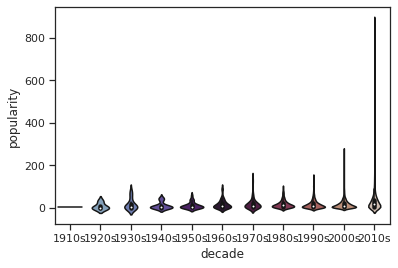

In [88]:
sns.set(context='notebook', style='ticks', palette='bright')

df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df = df[~df['release_date'].isna()]

df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), palette='twilight')

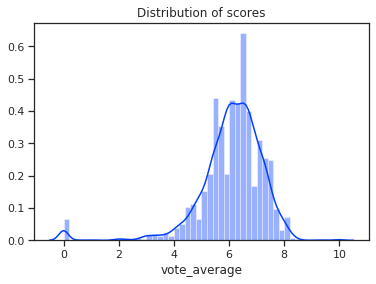

In [90]:
sns.distplot(df['vote_average'])
plt.title('Distribution of scores')
plt.savefig('saved_seaborn.png')